In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [6]:
weather = pd.read_csv("nyc_weather.csv")
planes = pd.read_csv("nyc_planes.csv")
flights_fixed = pd.read_csv("nyc_flights_fixed.csv")
airports = pd.read_csv("nyc_airports.csv")
airlines = pd.read_csv("nyc_airlines.csv")

In [7]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [8]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [9]:
flights_fixed.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
1,1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
2,2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
3,3,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
4,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z


In [10]:
airports.head()

,faa,name,latitude,longitude,altitude,timezone,dst,timezone_name
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [11]:
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [14]:
flights_fixed['dest'].nunique()

100

In [18]:
flights_fixed['date'] = pd.to_datetime(flights_fixed[['year', 'month', 'day']])
daily_destinations = flights_fixed.groupby('date')['dest'].nunique()
avg_daily_dest = round(daily_destinations.mean())
avg_daily_dest

81

In [20]:
daily_dest_df = daily_destinations.reset_index(name='unique_dest_count')
daily_dest_df['day_of_week'] = daily_dest_df['date'].dt.day_name()

In [21]:
daily_dest_df

,date,unique_dest_count,day_of_week
0,2013-01-01,80,Tuesday
1,2013-01-02,83,Wednesday
2,2013-01-03,82,Thursday
3,2013-01-04,81,Friday
4,2013-01-05,76,Saturday
...,...,...,...
360,2013-12-27,85,Friday
361,2013-12-28,84,Saturday
362,2013-12-29,85,Sunday
363,2013-12-30,84,Monday


In [23]:
avg_dest_per_weekday = daily_dest_df.groupby('day_of_week')['unique_dest_count'].mean()
avg_dest_per_weekday

day_of_week
Friday       81.923077
Monday       81.788462
Saturday     77.403846
Sunday       83.000000
Thursday     82.557692
Tuesday      80.396226
Wednesday    80.480769
Name: unique_dest_count, dtype: float64

In [ ]:
monthly_flights = flights_fixed.groupby('month').size()
monthly_flights

month
1     21989
2     20142
3     23650
4     23424
5     23959
6     23258
7     24174
8     24290
9     22954
10    24236
11    22836
12    23065
dtype: int64

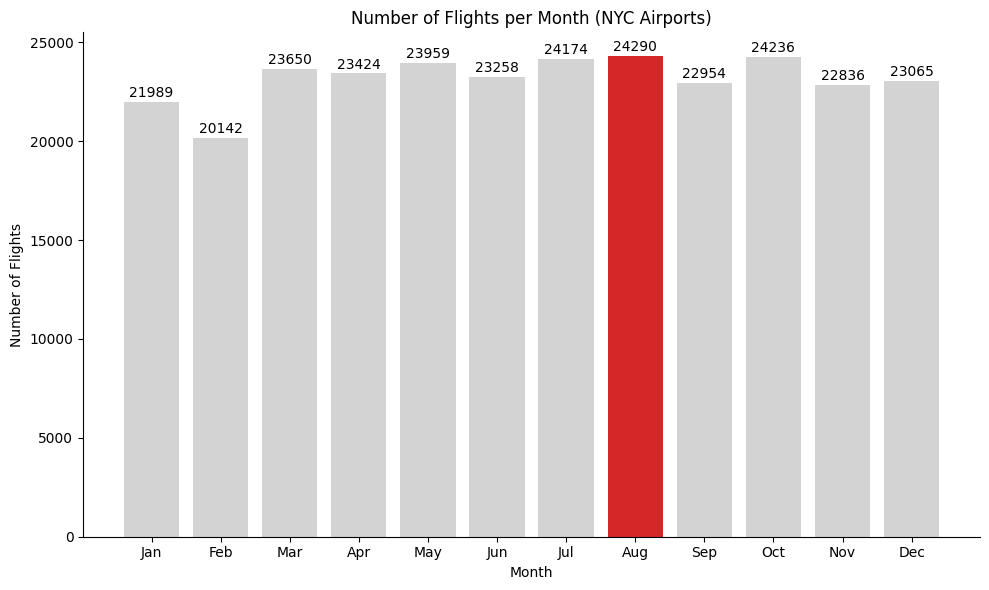

In [29]:
# Create a DataFrame for plotting
monthly_data = monthly_flights.reset_index(name='flight_count')

# Map month numbers to names for better readability
monthly_data['month_name'] = monthly_data['month'].apply(lambda x: calendar.month_abbr[x])

# Plotting
plt.figure(figsize=(10, 6))

# Create colors: all grey/blue, but highlight the max month (August)
colors = ['#1f77b4' if x != monthly_data['flight_count'].max() else '#d62728' for x in monthly_data['flight_count']]
# Actually, let's make the non-max ones a lighter grey to make the red pop more
colors = ['lightgray' if x != monthly_data['flight_count'].max() else '#d62728' for x in monthly_data['flight_count']]


bars = plt.bar(monthly_data['month_name'], monthly_data['flight_count'], color=colors)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month (NYC Airports)')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

# Clean up spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('monthly_flights_barchart.png')